# Geo Visualisation

In [105]:
from pathlib import Path
import iris
import numpy as np
data_path = Path("data")

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [249]:
cube = iris.load_cube(str(data_path / "iceoi_v2.nc"))

This is point data, which is not always ideal for post processing.

In [250]:
cube.coord('latitude').guess_bounds()
cube.coord('longitude').guess_bounds()
cube.coord('time').convert_units('seconds since 1970-01-01')

In [251]:
cube

<iris 'Cube' of Reynolds OI ice cover / (1) (time: 454; latitude: 180; longitude: 360)>

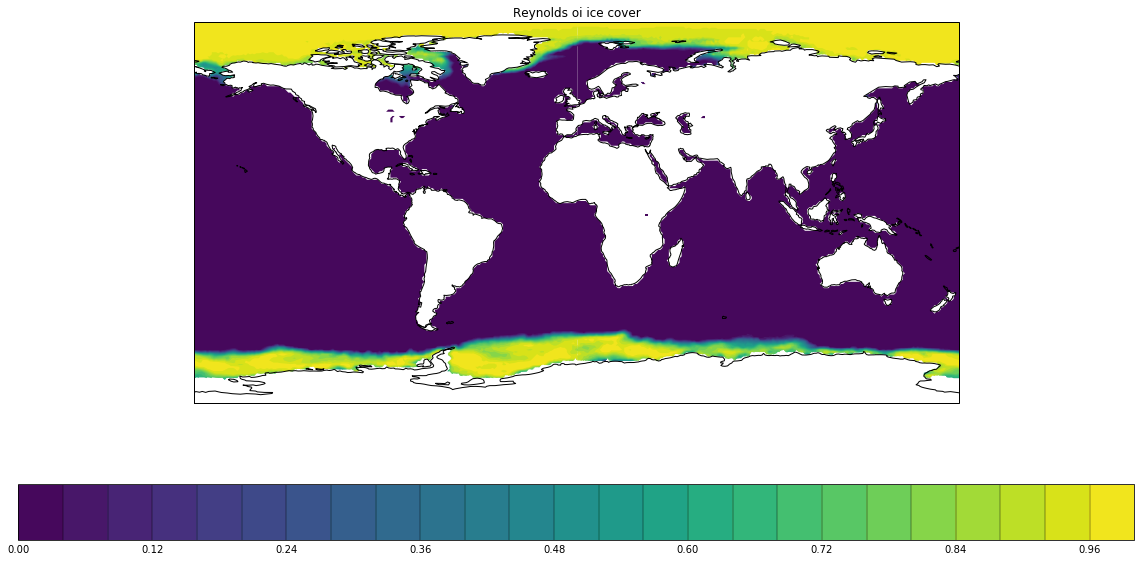

In [252]:
qplt.contourf(cube[0], 25)
plt.gca().coastlines()
plt.show()

# Using different projections

In [253]:
north = cube[:,90:]
north

<iris 'Cube' of Reynolds OI ice cover / (1) (time: 454; latitude: 90; longitude: 360)>

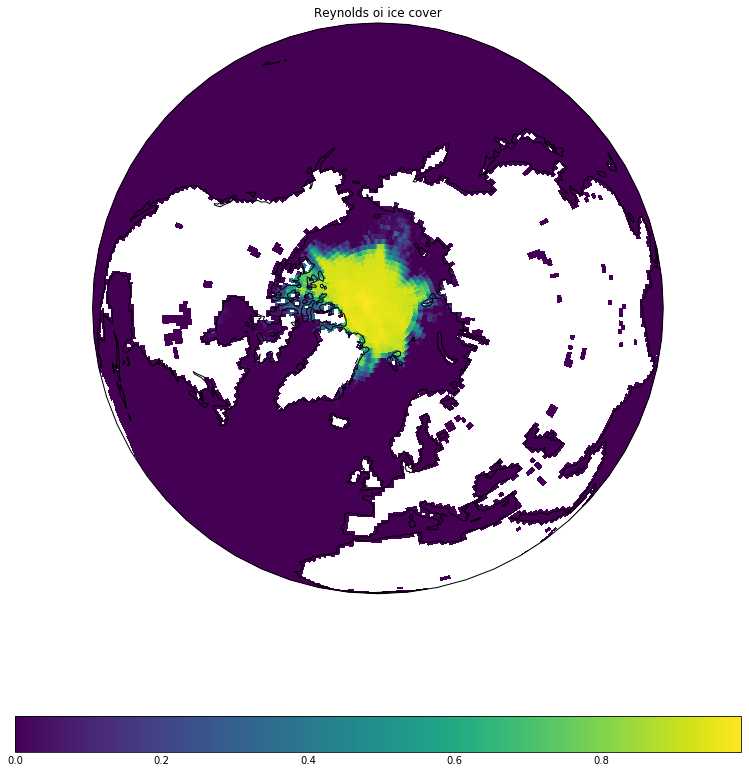

In [254]:
projection = ccrs.Orthographic(central_longitude=0, central_latitude=90)
# projection = ccrs.Mollweide(central_longitude=0)
plt.figure(figsize=(13, 15))
ax = plt.subplot(projection=projection)
# ax.set_global()
# plot with Iris quickplot pcolormesh
qplt.pcolormesh(north[-1])
# qplt.contourf(cube[-5], 25)
# Draw coastlines
ax.coastlines()

# Aggregates

In [290]:
grid_areas = iris.analysis.cartography.area_weights(north) # * Unit('m^2')
sic_mean = north.collapsed(['latitude', 'longitude'], iris.analysis.SUM, weights=grid_areas) / 1e6
sic_mean.units = Unit('(km)^2')

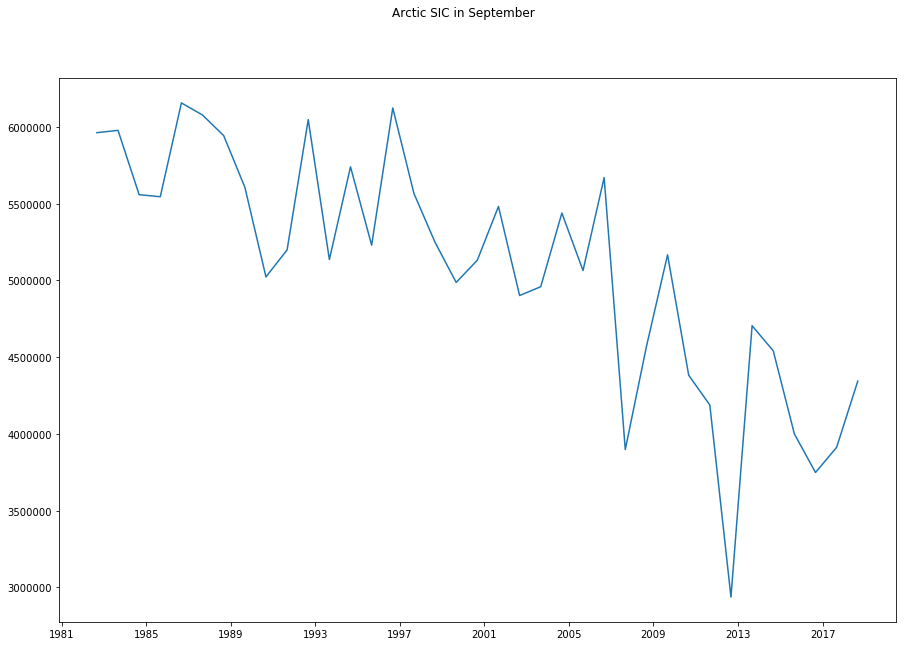

In [293]:
import iris.plot as iplt

plt.figure(figsize=(15,10))
# iplt.plot(sic_mean[4::12])
iplt.plot(sic_mean[10::12])
plt.suptitle('Arctic SIC in September')
plt.show()

In [274]:
north.units

Unit('1')

In [279]:
iris.analysis.cartography.DEFAULT_SPHERICAL_EARTH_RADIUS_UNIT)

cf_units.Unit

In [283]:
from cf_units import Unit

In [284]:
1 * Unit('m^2')

Unit('m2')